<a href="https://colab.research.google.com/github/dmattosfcb/data-intelligence-fcb/blob/mmm-crz/mmm_crz_presenciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'cruzeiro-do-sul-321120' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [2]:
!pip install google-cloud-bigquery statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from google.cloud import bigquery
import statsmodels.api as sm

# Configurando o cliente BigQuery
client = bigquery.Client(project='cruzeiro-do-sul-321120', location='US')

# Query para buscar os dados
query = """
SELECT *
FROM `cruzeiro-do-sul-321120.crz_estudos.vw_mmm_presenciais_unionall_date`
"""

# Fazendo a consulta e transformando em DataFrame
df = client.query(query).to_dataframe()

# Verificar se há dados faltantes (NaN)
print(df.isna().sum())

# Verificar se todos os dados são numéricos
print(df.dtypes)

# Criando as variáveis dependentes e independentes
# Excluindo a coluna 'data' do X
X_columns = ['volume_buscas','avg_buscas_concorrentes', 'mencoes', 'investimento_tv', 'investimento_ooh', 'investimento_radio', 
             'investimento_jornal', 'investimento_cinema', 'investimento_off', 'investimento_social', 
             'investimento_display', 'investimento_search', 'investimento_video', 'investimento_total', 
             'impactos_social', 'impactos_display', 'impactos_search', 'impactos_digital','sazonalidade_edu']

# Certifique-se que todas as colunas de X são numéricas
X = df[X_columns].apply(pd.to_numeric, errors='coerce')

Y = df['inscritos'].apply(pd.to_numeric, errors='coerce')

# Remover as linhas onde X ou Y tem algum valor NaN
df_clean = pd.concat([X, Y], axis=1).dropna()

X_clean = df_clean[X_columns]
Y_clean = df_clean['inscritos']

# Adicionando uma constante ao X
X_clean = sm.add_constant(X_clean)

# Construindo o Modelo de Regressão OLS (Ordinary Least Squares)
model = sm.OLS(Y_clean, X_clean).fit()

# Imprimindo o sumário da regressão
print(model.summary())




data                       0
volume_buscas              0
avg_buscas_concorrentes    0
mencoes                    0
investimento_tv            0
investimento_ooh           0
investimento_radio         0
investimento_jornal        0
investimento_cinema        0
investimento_off           0
investimento_social        0
investimento_display       0
investimento_search        0
investimento_video         0
investimento_total         0
impactos_social            0
impactos_display           0
impactos_search            0
impactos_digital           0
sazonalidade_edu           0
inscritos                  0
dtype: int64
data                        dbdate
volume_buscas              float64
avg_buscas_concorrentes    float64
mencoes                    float64
investimento_tv            float64
investimento_ooh           float64
investimento_radio         float64
investimento_jornal        float64
investimento_cinema        float64
investimento_off           float64
investimento_social        f

In [4]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


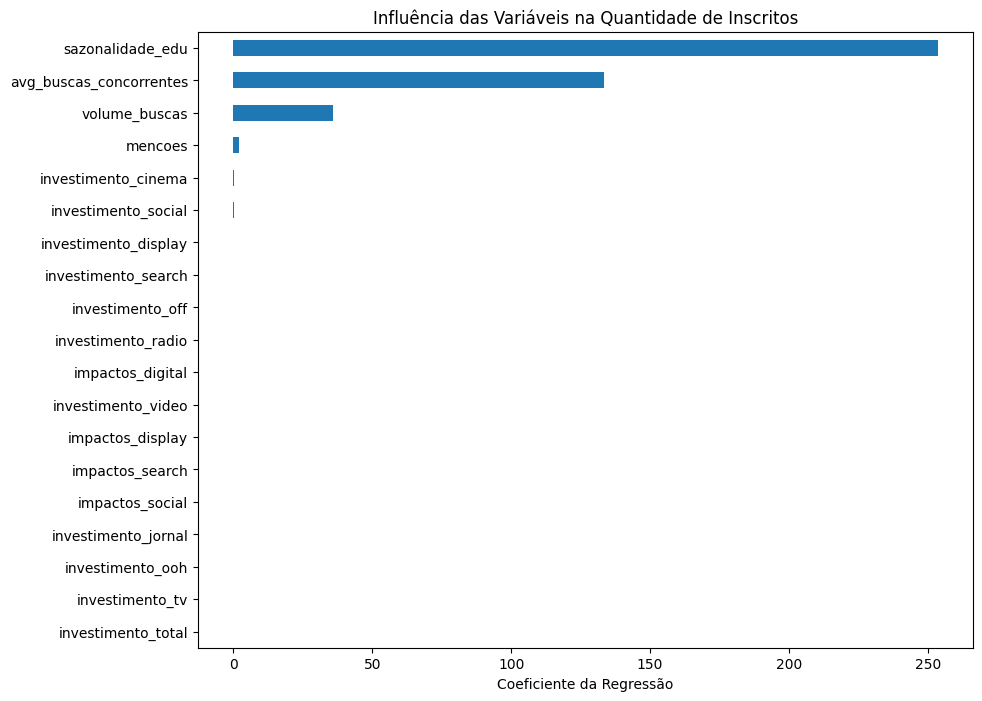

In [5]:
import matplotlib.pyplot as plt

# Pegando os coeficientes do modelo
coeff = model.params

# Removendo a constante
coeff = coeff.drop('const')

# Criando o gráfico
plt.figure(figsize=(10,8))
coeff.sort_values().plot(kind='barh')
plt.title('Influência das Variáveis na Quantidade de Inscritos')
plt.xlabel('Coeficiente da Regressão')
plt.show()
